In [1]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import math
import time
import pickle
from sklearn.model_selection import train_test_split

In [2]:
pickle_in=open("DogCatX.pickle",'rb')
DogCatX=pickle.load(pickle_in)
pickle_in.close()
pickle_in=open('DogCaty.pickle','rb')
DogCaty=pickle.load(pickle_in)
pickle_in.close()

In [3]:
DogCatX=np.reshape(DogCatX,(24946,2500))
DogCatX,DogCaty=shuffle(DogCatX,DogCaty,random_state=0)
X_train,X_test,y_train,y_test=train_test_split(DogCatX,DogCaty,random_state=5,test_size=0.25)

In [22]:
train_size=list(range(2,11,2))
train_size[:]=[x/10 for x in train_size]
errorate_train=[]
errorate_test=[]
learn_time=[]
for n in train_size:
    X_train,y_train=shuffle(X_train,y_train,random_state=0)
    X_train_sub=X_train[:int(len(X_train)*n)]
    y_train_sub=y_train[:int(len(y_train)*n)]
    time_start=time.clock()
    clf_entropy=DecisionTreeClassifier(criterion = "entropy",min_samples_split=0.005)
    clf_entropy.fit(X_train_sub,y_train_sub)
    errorate_train.append(1-accuracy_score(y_train_sub,clf_entropy.predict(X_train_sub)))
    errorate_test.append(1-accuracy_score(y_test,clf_entropy.predict(X_test))) 
    learn_time.append(time.clock()-time_start)    

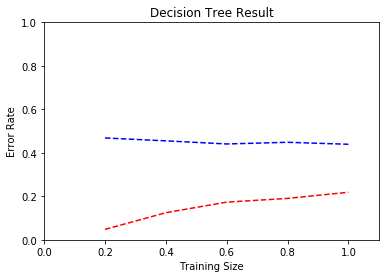

In [23]:
plt.plot(train_size,errorate_train,'r--',train_size,errorate_test,'b--')
plt.axis([0,1.1,0,1])
plt.ylabel('Error Rate')
plt.xlabel('Training Size')
plt.title('Decision Tree Result')
plt.savefig('E:/Machine Learning/HW1/DogCat/DogCat_DT_Error.png')


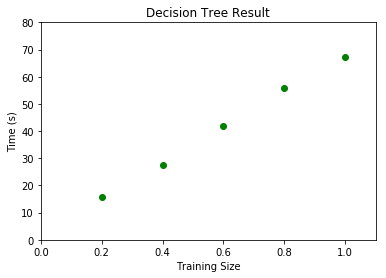

In [28]:
plt.plot(train_size,learn_time,'go')
plt.axis([0,1.1,0,80])
plt.ylabel('Time (s)')
plt.xlabel('Training Size')
plt.title('Decision Tree Result')
plt.savefig('E:/Machine Learning/HW1/DogCat/DogCat_DT_T.png')

In [27]:
errorate_test

[0.4683341350008017,
 0.455026455026455,
 0.4407567740901074,
 0.44845278178611514,
 0.439313772647106]

Cross Validation to tune parameters

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
param_dist={'criterion':['gini','entropy'],
            'min_samples_leaf':[0.005,0.01,0.015,0.02,0.025]  
}
tree=DecisionTreeClassifier()
tree_cv=RandomizedSearchCV(tree,param_dist,cv=5)

In [44]:
tree_cv.fit(X_train,y_train)

ValueError: Invalid parameter subsample for estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'). Check the list of available parameters with `estimator.get_params().keys()`.

In [33]:
tree_cv.best_params_

{'min_samples_leaf': 0.025, 'criterion': 'entropy'}

In [35]:
1-tree_cv.best_score_

0.4218825164359399

In [36]:
y_pred=tree_cv.predict(X_test)

In [40]:
1-accuracy_score(y_test,y_pred)

0.4186307519640853